**Translating Empirical Bayes examples from variance explained from R to Python**

http://varianceexplained.org/r/empirical_bayes_baseball/

In [1]:
!ls lahmanbaseballdatabase/

AllstarFull.csv		 Fielding.csv	   PitchingPost.csv
Appearances.csv		 FieldingOF.csv    Salaries.csv
AwardsManagers.csv	 FieldingPost.csv  Schools.csv
AwardsPlayers.csv	 HallOfFame.csv    SchoolsPlayers.csv
AwardsShareManagers.csv  Managers.csv	   SeriesPost.csv
AwardsSharePlayers.csv	 ManagersHalf.csv  Teams.csv
Batting.csv		 Master.csv	   TeamsFranchises.csv
BattingPost.csv		 Pitching.csv	   TeamsHalf.csv


In [2]:
import pandas as pd 
import numpy as np
from pathlib import Path
import pymc3 as pm
import theano.tensor as tt
import seaborn as sns

In [3]:
data_folder = Path('lahmanbaseballdatabase/')

In [4]:
batting_df = pd.read_csv(data_folder / 'Batting.csv')

In [5]:
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,aardsda01,2006,1,CHN,NL,45,43.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
2,aardsda01,2007,1,CHA,AL,25,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,aardsda01,2008,1,BOS,AL,47,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
4,aardsda01,2009,1,SEA,AL,73,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
pitching_df = pd.read_csv(data_folder / 'Pitching.csv')

In [7]:
pitching_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,2004,1,SFN,NL,1,0,11,0,0,...,0.0,0.0,2.0,0.0,61.0,5.0,8,NaN,NaN,NaN
1,aardsda01,2006,1,CHN,NL,3,0,45,0,0,...,0.0,1.0,1.0,0.0,225.0,9.0,25,NaN,NaN,NaN
2,aardsda01,2007,1,CHA,AL,2,1,25,0,0,...,3.0,2.0,1.0,0.0,151.0,7.0,24,NaN,NaN,NaN
3,aardsda01,2008,1,BOS,AL,4,2,47,0,0,...,2.0,3.0,5.0,0.0,228.0,7.0,32,NaN,NaN,NaN
4,aardsda01,2009,1,SEA,AL,3,6,73,0,0,...,3.0,2.0,0.0,0.0,296.0,53.0,23,NaN,NaN,NaN


**H** : Career Hits <br>
**AB** : At Bats

R code below used to create a new dataframe

``` r 
career <- Batting %>%
  filter(AB > 0) %>%
  anti_join(Pitching, by = "playerID") %>%
  group_by(playerID) %>%
  summarize(H = sum(H), AB = sum(AB)) %>%
  mutate(average = H / AB)
```

Anti-join example in Pandas

``` python
# Identify what values are in TableB and not in TableA
key_diff = set(TableB.Key).difference(TableA.Key)
where_diff = TableB.Key.isin(key_diff)

# Slice TableB accordingly and append to TableA
TableA.append(TableB[where_diff], ignore_index=True)
```

In [8]:
batting_df.loc[batting_df['AB'] > 0]

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
1,aardsda01,2006,1,CHN,NL,45,43.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
3,aardsda01,2008,1,BOS,AL,47,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
7,aaronha01,1954,1,ML1,NL,122,122.0,468.0,58.0,131.0,...,2.0,2.0,28.0,39.0,NaN,3.0,6.0,4.0,13.0,122.0
8,aaronha01,1955,1,ML1,NL,153,153.0,602.0,105.0,189.0,...,3.0,1.0,49.0,61.0,5.0,3.0,7.0,4.0,20.0,153.0
9,aaronha01,1956,1,ML1,NL,153,153.0,609.0,106.0,200.0,...,2.0,4.0,37.0,54.0,6.0,2.0,5.0,7.0,21.0,153.0
10,aaronha01,1957,1,ML1,NL,151,151.0,615.0,118.0,198.0,...,1.0,1.0,57.0,58.0,15.0,0.0,0.0,3.0,13.0,151.0
11,aaronha01,1958,1,ML1,NL,153,153.0,601.0,109.0,196.0,...,4.0,1.0,59.0,49.0,16.0,1.0,0.0,3.0,21.0,153.0
12,aaronha01,1959,1,ML1,NL,154,154.0,629.0,116.0,223.0,...,8.0,0.0,51.0,54.0,17.0,4.0,0.0,9.0,19.0,154.0
13,aaronha01,1960,1,ML1,NL,153,153.0,590.0,102.0,172.0,...,16.0,7.0,60.0,63.0,13.0,2.0,0.0,12.0,8.0,153.0
14,aaronha01,1961,1,ML1,NL,155,155.0,603.0,115.0,197.0,...,21.0,9.0,56.0,64.0,20.0,2.0,1.0,9.0,16.0,155.0


In [9]:
key_diff = set(pitching_df['playerID']).difference(batting_df['playerID'])

In [10]:
where_diff = pitching_df.isin(key_diff)

In [11]:
career = pd.DataFrame()

In [12]:
career['H'] = batting_df.loc[batting_df['AB'] > 0].append(pitching_df[where_diff], ignore_index= True).groupby('playerID').sum()['H']

/home/ubuntu/anaconda3/envs/tempo/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [13]:
career['AB'] = batting_df.loc[batting_df['AB'] > 0].append(pitching_df[where_diff], ignore_index= True).groupby('playerID').sum()['AB']

In [14]:
career.loc[:, 'average'] = career['H'] / career['AB']

In [15]:
career

,H,AB,average
playerID,,,
aardsda01,0.0,3.0,0.000000
aaronha01,3771.0,12364.0,0.304998
aaronto01,216.0,944.0,0.228814
aasedo01,0.0,5.0,0.000000
abadan01,2.0,21.0,0.095238
abadfe01,1.0,8.0,0.125000
abadijo01,11.0,49.0,0.224490
abbated01,772.0,3044.0,0.253614
abbeybe01,38.0,225.0,0.168889


``` r 
# use names along with the player IDs
career <- Master %>%
  tbl_df() %>%
  select(playerID, nameFirst, nameLast) %>%
  unite(name, nameFirst, nameLast, sep = " ") %>%
  inner_join(career, by = "playerID") %>%
  select(-playerID)
```

In [16]:
master_df = pd.read_csv(data_folder / 'Master.csv', encoding = 'ISO-8859-1')

In [17]:
master_df.columns

Index(['lahmanID', 'playerID', 'managerID', 'hofID', 'birthYear', 'birthMonth',
       'birthDay', 'birthCountry', 'birthState', 'birthCity', 'deathYear',
       'deathMonth', 'deathDay', 'deathCountry', 'deathState', 'deathCity',
       'nameFirst', 'nameLast', 'nameNote', 'nameGiven', 'nameNick', 'weight',
       'height', 'bats', 'throws', 'debut', 'finalGame', 'college',
       'lahman40ID', 'lahman45ID', 'retroID', 'holtzID', 'bbrefID'],
      dtype='object')

In [18]:
master_df['name'] = master_df['nameFirst'] + ' ' + master_df['nameLast']

In [19]:
career = pd.merge(career, master_df[['playerID', 'name']], on='playerID')

In [20]:
career.loc[career['name'] == 'Hank Aaron']

,playerID,H,AB,average,name
1,aaronha01,3771.0,12364.0,0.304998,Hank Aaron


The player stats above matches with the post

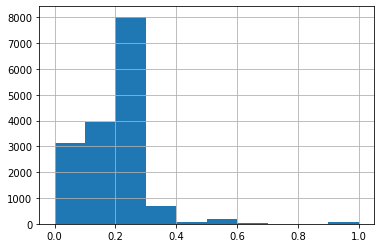

In [21]:
career.average.hist()

X ~ Beta(α, β)

Using a Beta distribution to model the career average

``` r
# just like the graph, we have to filter for the players we actually
# have a decent estimate of
career_filtered <- career %>%
    filter(AB >= 500)

m <- MASS::fitdistr(career_filtered$average, dbeta,
                    start = list(shape1 = 1, shape2 = 10))

alpha0 <- m$estimate[1]
beta0 <- m$estimate[2]
```

In [22]:
career_filtered = career.loc[career['AB'] >= 500]

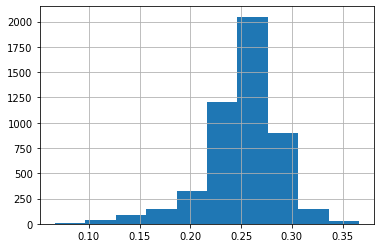

In [23]:
career_filtered.average.hist()

In [24]:
min(career_filtered.average.values)

0.06646525679758308

In [ ]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu = 50, sigma= 100)
    beta = pm.Normal('beta', mu = 100, sigma= 200)
    obs = pm.Beta('obs', alpha = alpha, beta = beta, observed = career_filtered.average.values)
    
    trace = pm.sample(10000, tune=5000)

In [26]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu = 0, sigma= 2)
    beta = pm.Normal('beta', mu = 100, sigma= 200)
    obs = pm.Beta('obs', alpha = alpha, beta = beta, observed = career_filtered.average.values)
    
    trace = pm.sample(10000, tune=5000)

/home/ubuntu/anaconda3/envs/tempo/lib/python3.6/site-packages/pymc3/distributions/continuous.py:88: UserWarning: The variable specified for alpha has negative support for Beta, likely making it unsuitable for this parameter.
  warnings.warn(msg)
/home/ubuntu/anaconda3/envs/tempo/lib/python3.6/site-packages/pymc3/distributions/continuous.py:88: UserWarning: The variable specified for beta has negative support for Beta, likely making it unsuitable for this parameter.
  warnings.warn(msg)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
Sampling 4 chains:   0%|          | 33/60000 [00:00<03:16, 305.15draws/s]/home/ubuntu/anaconda3/envs/tempo/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tempo/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **k

ParallelSamplingError: Bad initial energy

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f401fa4a160>,
      dtype=object)

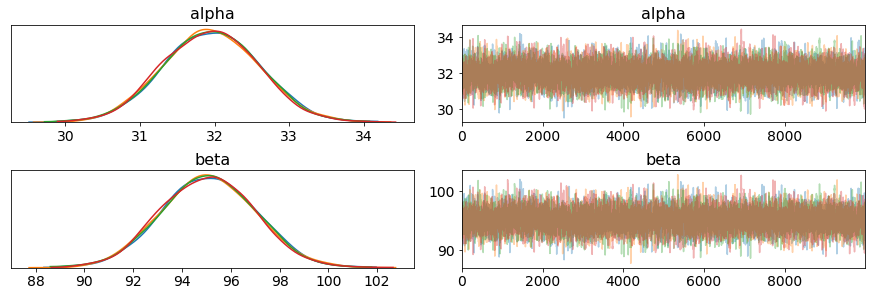

In [54]:
pm.traceplot(trace)

In [64]:
alpha_mean = trace.get_values('alpha', chains=1).mean()

In [65]:
beta_mean = trace.get_values('beta', chains =1).mean()

In [56]:
with model:
    post_pred = pm.sample_posterior_predictive(trace, samples= 500)

100%|██████████| 500/500 [00:00<00:00, 911.98it/s]


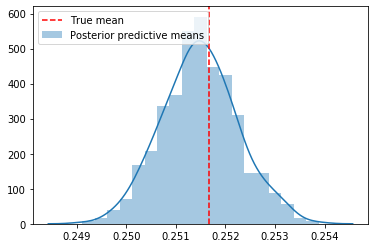

In [59]:
fig, ax = plt.subplots()
sns.distplot(post_pred['obs'].mean(axis=1), label='Posterior predictive means', ax=ax)
ax.axvline(career_filtered.average.values.mean(), ls='--', color='r', label='True mean')
ax.legend();

**Using Scipy to estimate the beta distribution**

In [27]:
from scipy.stats import beta
import matplotlib.pyplot as plt

In [28]:
alpha0, beta0, _, _ = beta.fit(career_filtered.average, floc=0, fscale= 1)

In [29]:
alpha0

31.934263480835025

In [30]:
beta0

95.02871581265897

/home/ubuntu/anaconda3/envs/tempo/lib/python3.6/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


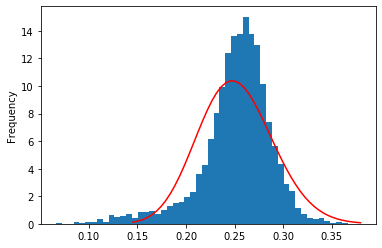

In [31]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
x = np.linspace(beta.ppf(0.001, alpha0, beta0),
               beta.ppf(0.999, alpha0, beta0))
ax.plot(x, beta.pdf(x, alpha0, beta0), 'r-', label='beta pdf')
career_filtered.average.plot.hist(bins=50, normed=True)
plt.show()

In [69]:
career['eb_estimate'] = (career['H'] + alpha_mean) / (career['AB'] + alpha_mean + beta_mean)

In [70]:
career

,playerID,H,AB,average,name,eb_estimate
0,aardsda01,0.0,3.0,0.000000,David Aardsma,0.245717
1,aaronha01,3771.0,12364.0,0.304998,Hank Aaron,0.304454
2,aaronto01,216.0,944.0,0.228814,Tommie Aaron,0.231507
3,aasedo01,0.0,5.0,0.000000,Don Aase,0.241995
4,abadan01,2.0,21.0,0.095238,Andy Abad,0.229351
5,abadfe01,1.0,8.0,0.125000,Fernando Abad,0.244024
6,abadijo01,11.0,49.0,0.224490,John Abadie,0.243996
7,abbated01,772.0,3044.0,0.253614,Ed Abbaticchio,0.253530
8,abbeybe01,38.0,225.0,0.168889,Bert Abbey,0.198708
9,abbeych01,492.0,1751.0,0.280982,Charlie Abbey,0.278989
